In [2]:
# To train call 'neat_train.py' with arguments.
!python neat_train.py -h

/Users/xiaoyuhang/anaconda3/envs/volley/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
# Train using default NEAT parameters on cart-pole swing-up with a small population and few generations
!cat p/quickTest.json
!python neat_train.py -p p/quickTest.json

In [ ]:
# -- View stats of a completed run
# Rows:
# 0 - Fitness evaluations used
# 1 - Median fitness of population
# 2 - Max fitness of population
# 3 - Top fitness every achieved
# 4 - Median number of nodes of individuals in population
# 5 - Median number of connections of individuals in population
from matplotlib import pyplot as plt
import numpy as np
stats = np.loadtxt('demo/swingup/test_stats.out', delimiter=',')
fig, ax = plt.subplots()
x = stats[:,0]
y = stats[:,[1,2,3]]
plt.plot(y)
plt.legend(['Median Fitness','Max Fitness','Best Fitness'])
plt.xlabel('Evaluations')
plt.ylabel('Fitness')

# of Connections in ANN:  16


(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

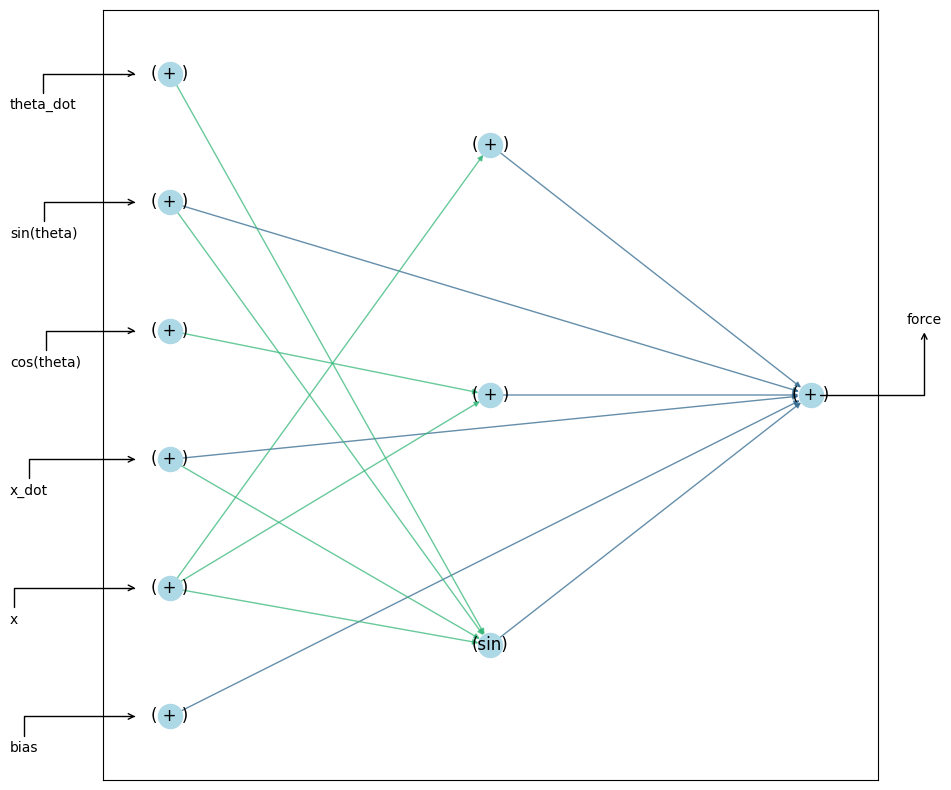

In [66]:
# -- View Topology of Network
# Lighter color connections are connected to earlier layers (NOT weight strength)
import vis as nv
nv.viewInd('demo/swingup/test_best.out','swingup')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


(<Figure size 2000x1000 with 2 Axes>,
 <Axes: >,
 <Axes: title={'center': '2D Classification with Decision Boundary'}, xlabel='X', ylabel='Y'>)

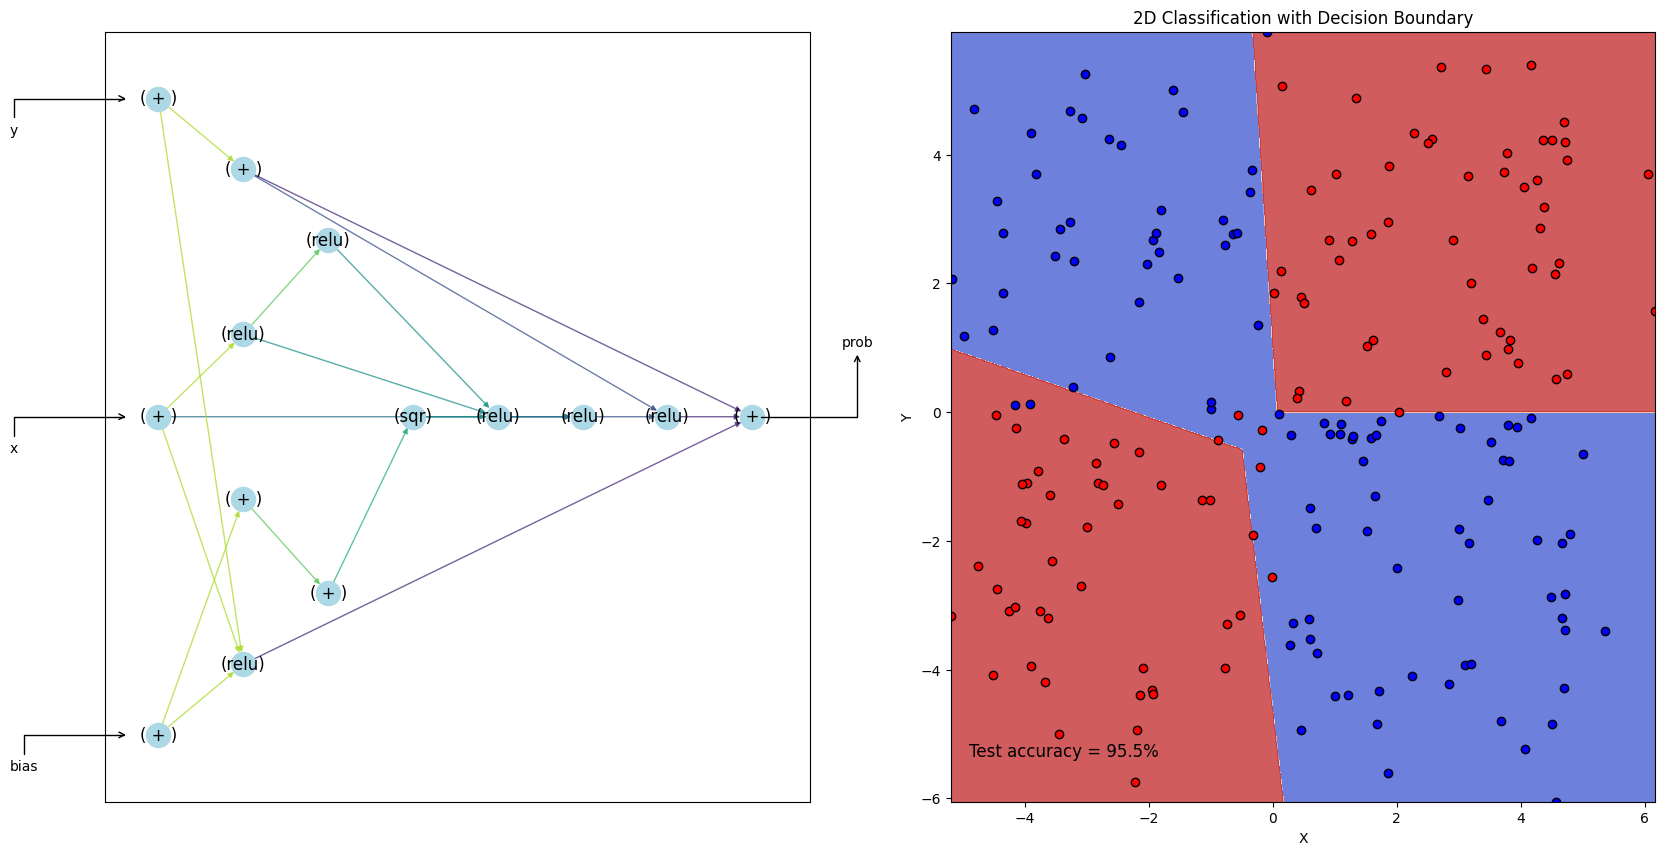

In [67]:
nv.viewClassifier('log/XOR_best.out','backprop_XOR', seed=None)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


(<Figure size 2000x1000 with 2 Axes>,
 <Axes: >,
 <Axes: title={'center': '2D Classification with Decision Boundary'}, xlabel='X', ylabel='Y'>)

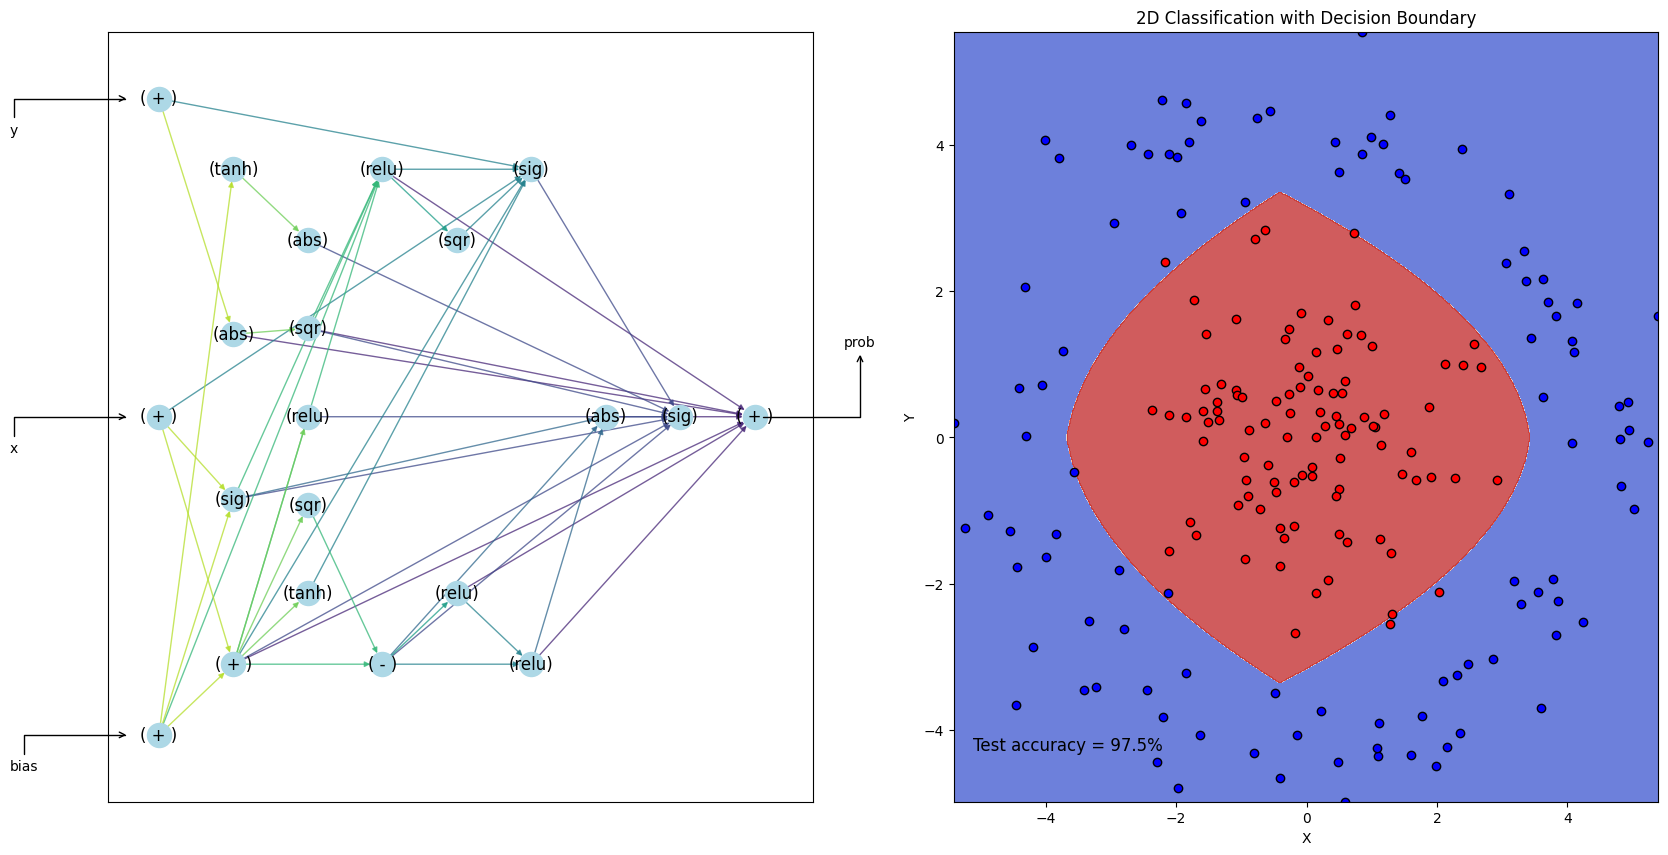

In [68]:
nv.viewClassifier('log/circle_best.out','backprop_circle', seed=None)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


(<Figure size 2000x1000 with 2 Axes>,
 <Axes: >,
 <Axes: title={'center': '2D Classification with Decision Boundary'}, xlabel='X', ylabel='Y'>)

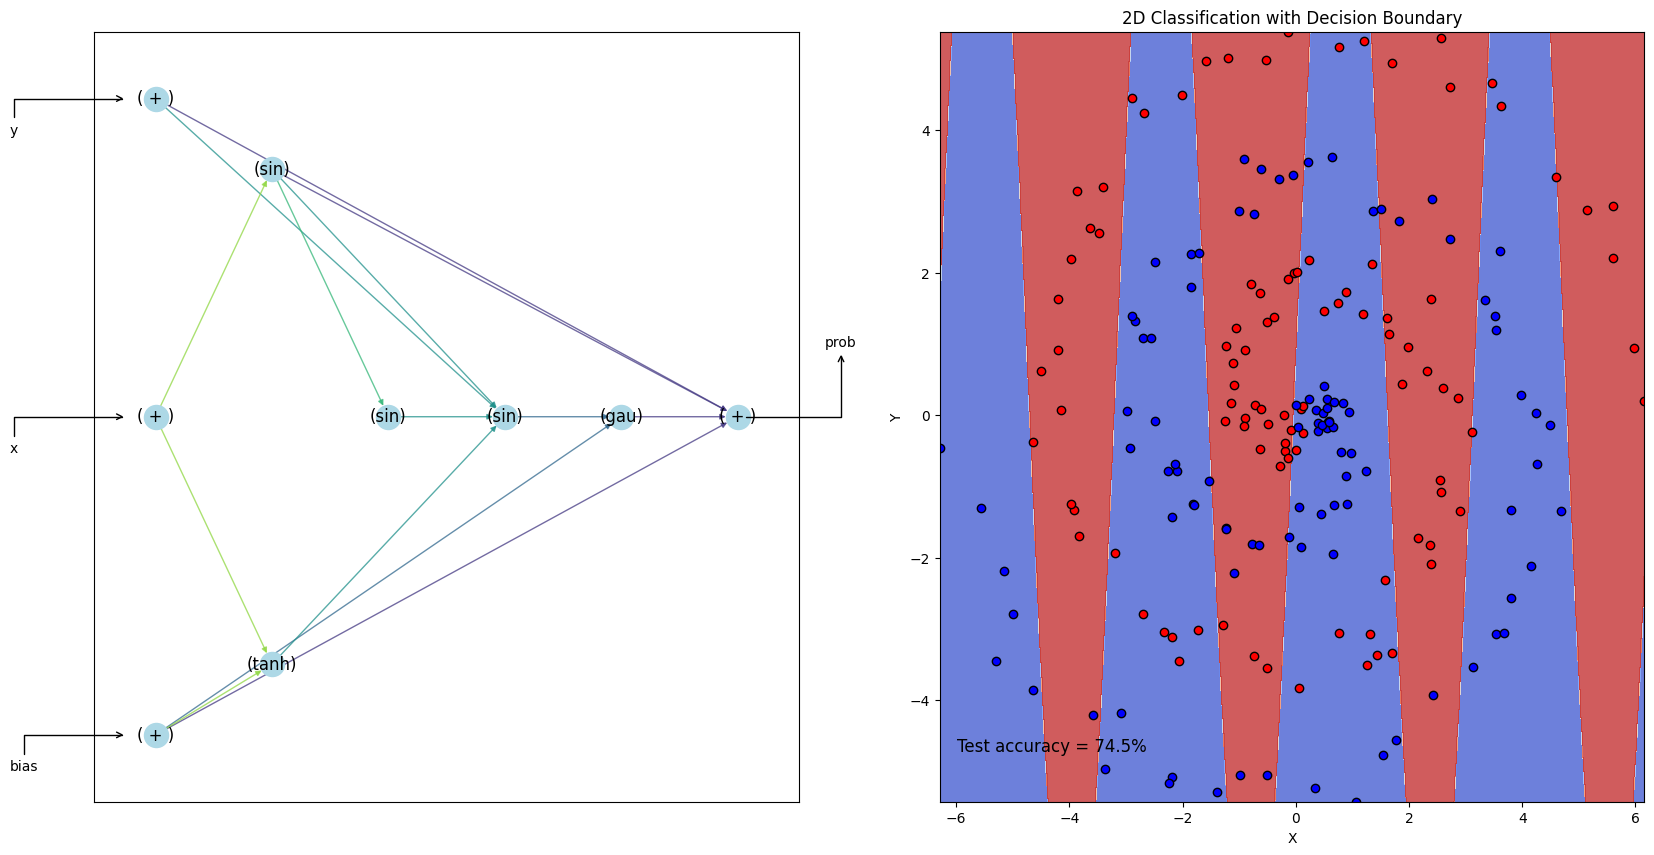

In [69]:
nv.viewClassifier('log/spiral_best.out','backprop_spiral', seed=None)
# nv.viewClassifier('log/spiral_best/0015.out','backprop_spiral', seed=None)

In [ ]:
# -- View Behavior of Network
!python neat_test.py -p p/swingup.json -i demo/swingup/test_best.out --view True

In [ ]:
# -- Compare Replicates
# Run several experiments 
#  for i in {0..10}; do python neat_train.py -p p/swingup.json -n 96 -o tanh_$i; done
#  for i in {0..10}; do python neat_train.py -p p/swing_allAct.json -n 96 -o allAct_$i; done
#
# View results as median and quartiles
#
import vis as nv
experiment_1 = 'demo/swingup/tanh'
experiment_2 = 'demo/swingup/allAct'
_,_,bestRun = nv.viewReps([experiment_1,experiment_2],label=['Tanh Only','All Activation Functions'],\
                           title='Best Fitness Found with Uniform or Diverse Activations',getBest=True)